In [8]:
# data: Mall_Customers.csv
# location: https://mitu.co.in/dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### create input data

In [10]:
x = df.iloc[:, [3,4]]

In [12]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


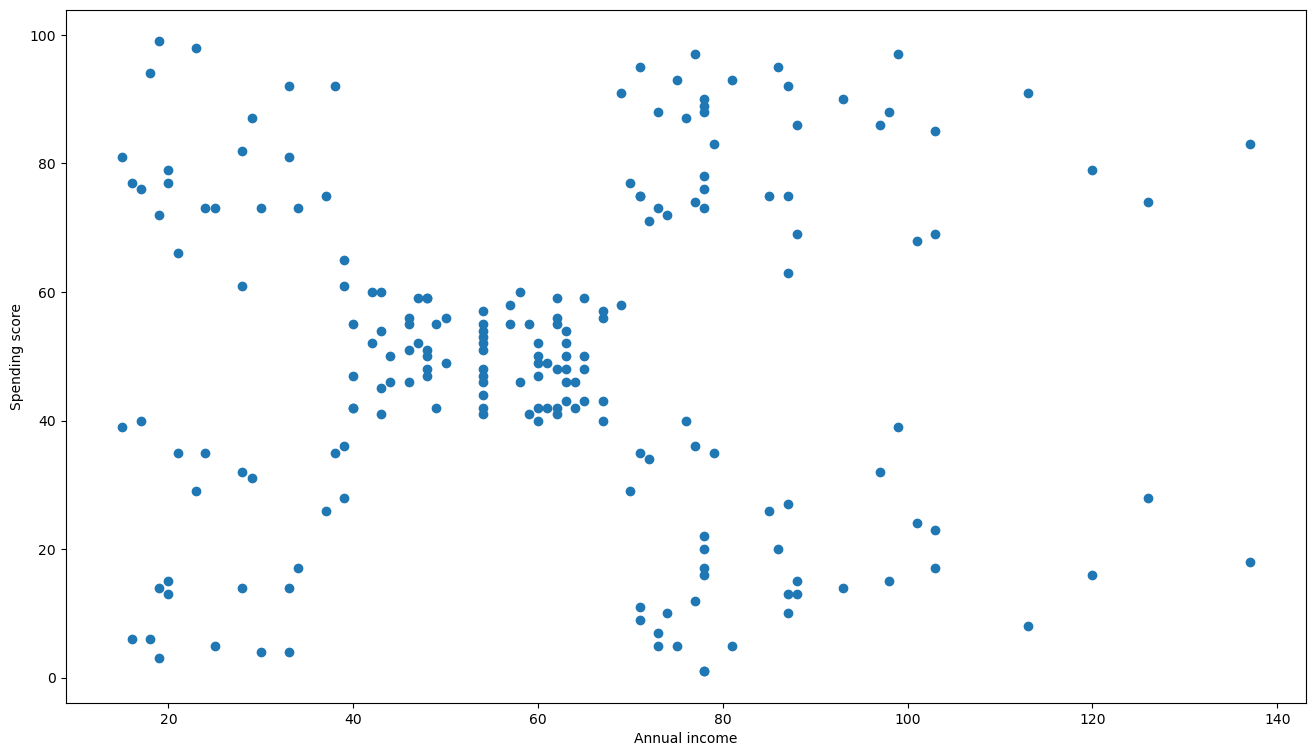

In [18]:
plt.figure(figsize=(16,9))
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)']);

In [20]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters= 3)

In [24]:
labels = km.fit_predict(x)

In [26]:
km.inertia_

106348.37306211122

In [30]:
sse = []

for k in range(1, 16):
    km = KMeans(n_clusters= k, random_state= 0)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [32]:
sse

[269981.28,
 185917.1425392852,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 38858.959975143895,
 31969.42655023547,
 29858.483597603947,
 22209.851608025543,
 20786.936692059156,
 18612.222868009678,
 17083.672501709312,
 16511.947370563892,
 15599.148331445114,
 14697.298899626934]

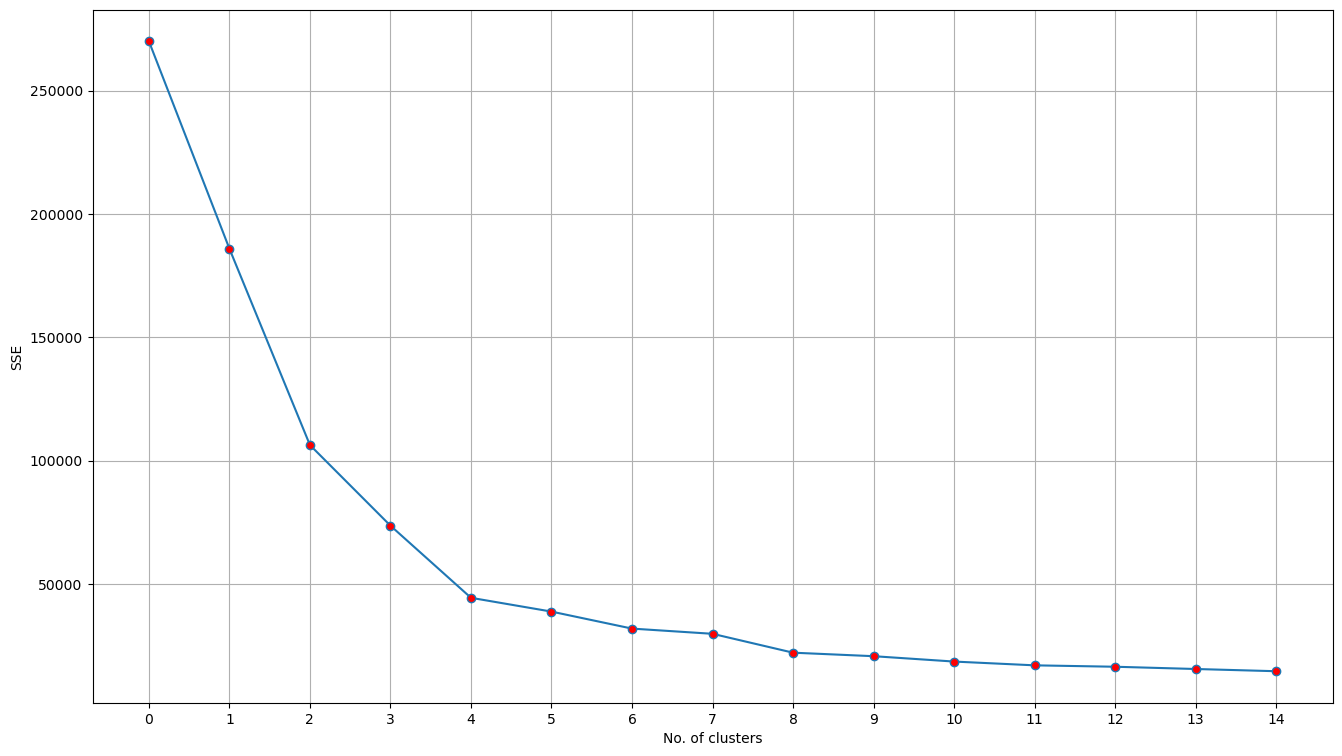

In [40]:
plt.figure(figsize=(16, 9))
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.xticks(range(0, 17))
plt.plot(sse, marker = 'o', mfc = 'red');
plt.grid()

In [42]:
# !pip install kneed

In [44]:
from kneed import KneeLocator

In [46]:
kl = KneeLocator(range(1,16), sse, curve = 'convex', direction = 'decreasing')

In [48]:
kl.elbow

5

### Silh method

In [51]:
from sklearn.metrics import silhouette_score

In [61]:
silh = []
for k in range(2, 16):
    km = KMeans(n_clusters= k, random_state= 0)
    labels = km.fit_predict(x)
    score  = silhouette_score(x, labels)
    silh.append(score)

In [71]:
silh;

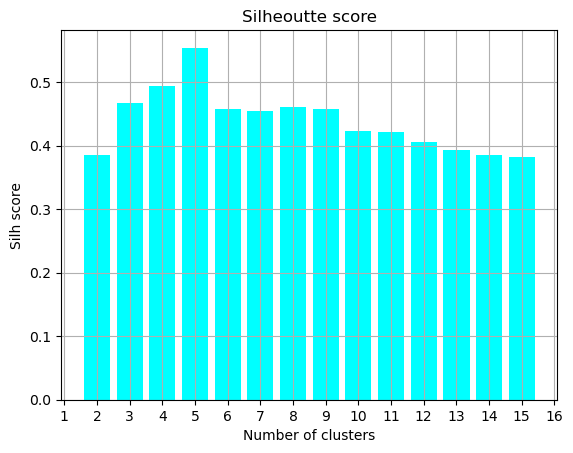

In [69]:
plt.title('Silheoutte score')
plt.xlabel('Number of clusters')
plt.ylabel('Silh score')
plt.xticks(range(17))
plt.bar(range(2, 16), silh, color = 'cyan');
plt.grid()

In [73]:
km = KMeans(n_clusters= 5, random_state= 0)

In [75]:
labels = km.fit_predict(x)

In [77]:
km.inertia_

44448.4554479337

In [85]:
labels;

In [83]:
cent  = km.cluster_centers_
cent

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

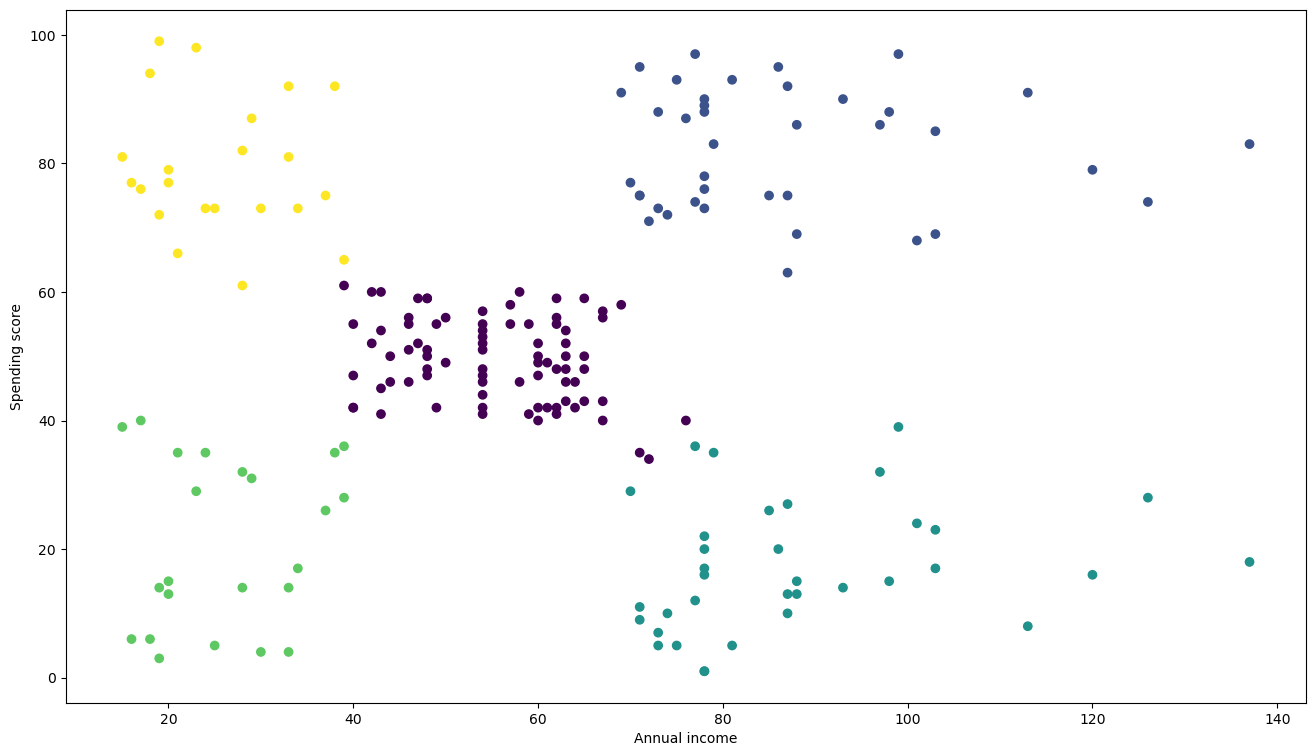

In [87]:
plt.figure(figsize=(16,9))
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c = labels);

#### filter out

In [90]:
zero = df[labels == 0]

In [92]:
zero

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


#### export the cluster

In [97]:
zero.to_csv('cluster1.csv', index= False)

### predict on new value

In [106]:
new1 = [[45, 67]]
new2 = [[15, 57]]

In [108]:
km.predict(new1)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [110]:
km.predict(new2)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)